In [1]:
import utils
import pandas as pd
import networkx as nx
from pyvis.network import Network
from difflib import SequenceMatcher
from pathlib import Path

In [2]:
doacoes_f = Path('doacoes')
if not doacoes_f.exists():
    doacoes_f.mkdir(parents=True)

# Grafos

## Grupo Benassi

In [3]:
b_graph = nx.read_graphml('benassi/benassi.graphml')

In [4]:
custom_options = '''
const options = {
  "nodes": {
    "borderWidth": 2,
    "borderWidthSelected": null,
    "opacity": 1,
    "font": {
      "size": 42,
      "face": "verdana"
    },
    "shadow": {
      "enabled": true
    },
    "size": 20
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "selfReferenceSize": null,
    "selfReference": {
      "angle": 0.7853981633974483
    },
    "smooth": {
      "forceDirection": "none"
    }
  },
  "interaction": {
    "navigationButtons": true,
    "hover": true
  },
  "manipulation": {
    "enabled": true
  },
  "physics": {
    "repulsion": {
      "centralGravity": 0.01,
      "springConstant": 0.08,
      "nodeDistance": 800
    },
    "minVelocity": 0.75,
    "solver": "repulsion"
  }
}
'''

In [5]:
nt = Network(
    height='800',
    width='100%',
    notebook=True,
    cdn_resources='remote'
)

nt.from_nx(b_graph)

for node in nt.nodes:
    node['label'] = node.get('label').title()
    
    if node.get('nome'):
        node['nome'] = node.get('nome').title()
    elif node.get('razão social'):
        node['razão social'] = node.get('razão social').title()

nt.set_options(custom_options)

nt.show('benassi/benassi.html')

benassi/benassi.html


## Grupo Hygia

In [6]:
custom_options = '''
const options = {
  "nodes": {
    "borderWidth": 2,
    "borderWidthSelected": null,
    "opacity": 1,
    "font": {
      "size": 42,
      "face": "verdana"
    },
    "shadow": {
      "enabled": true
    },
    "size": 20
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "selfReferenceSize": null,
    "selfReference": {
      "angle": 0.7853981633974483
    },
    "smooth": {
      "forceDirection": "none"
    }
  },
  "interaction": {
    "navigationButtons": true,
    "hover": true
  },
  "manipulation": {
    "enabled": true
  },
  "physics": {
    "repulsion": {
      "centralGravity": 0.01,
      "springConstant": 0.08,
      "nodeDistance": 350
    },
    "minVelocity": 0.75,
    "solver": "repulsion"
  }
}
'''

In [7]:
h_graph = nx.read_graphml('hygia/hygia.graphml')

nt = Network(
    height='800px',
    width='100%',
    notebook=True,
    cdn_resources='remote'
)

nt.from_nx(h_graph)

for node in nt.nodes:
    node['label'] = node.get('label').title()
    
    if node.get('nome'):
        node['nome'] = node.get('nome').title()
    elif node.get('razão social'):
        node['razão social'] = node.get('razão social').title()



nt.set_options(custom_options)
nt.show('hygia/hygia.html')

hygia/hygia.html


# Dados de Extratos e Empresas


## Download das bases

In [8]:
utils.download_files(
    fresh_files=False,
    folder_name='data',
)


[-] Socios0.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios1.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios2.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios3.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios4.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios5.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios6.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios7.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios8.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] Socios9.zip encontrado na pasta de downloads.
Ignorando este arquivo...

[-] extrato_bancario_candidato_2020.zip encontrado na pasta de downloads.
Ignorando este arquivo...


## Cruzamento das bases de sócios e extratos dos principais prefeitos

In [10]:
df_extrato = utils.load_into_dataframe(
    filetype="extrato",
    major_cities_only=True
)

In [13]:
# A base da Receita Federal omite parte do CPF dos sócios de empresas
# Para o cruzamento adequado é necessário criar uma coluna
# com os dados no mesmo formato para que sejam encontradas
# combinações válidas entre os campos.

df_extrato['CPF_FORMATO_RF'] = (
    df_extrato['NR_CPF_CNPJ_CONTRAPARTE']
    .str.replace("^\d{3}", "***", regex=True)
    .str.replace("\d{2}$", "**", regex=True)
)

In [17]:
# Candidatos que mais arrecadaram doações de pessoas física
# em ordem decrescente.
(
    df_extrato.
    groupby('NM_PRESTADOR_CONTA')['VR_LANCAMENTO']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

,NM_PRESTADOR_CONTA,VR_LANCAMENTO
0,bruno covas lopes,4691998.81
1,jose sarto nogueira moreira,2823545.16
2,emanuel pinheiro,2290635.20
3,hildon de lima chaves,1678407.50
4,sebastiao de araujo melo,1553986.20
5,marcos marcello trad,1466977.53
6,joao henrique holanda caldas,1391240.29
7,edvaldo nogueira filho,1259793.75
8,alvaro costa dias,1020044.29
9,cicero de lucena filho,947037.63


In [18]:
df_socios = utils.load_into_dataframe(
    filetype="socios",
    valid_CPFs=df_extrato['CPF_FORMATO_RF'].to_list()
)

df_socios['nome_socio'] = df_socios['nome_socio'].apply(utils.normalize_str)

# A base de Sócios da Receita Federal foi carregada em meados de 2024. Para diminuir
# a chance de falso positivos na análise, foi decidido que é mais prudente
# considerar as pessoas que entraram em sociedade até o primeiro dia do ano eleitoral
df_socios = df_socios[df_socios['data_entrada_sociedade'] < 20200101]
df_socios = df_socios.reset_index(drop=True)

In [19]:
df_socios

,cnpj_basico,nome_socio,cpf_socio,data_entrada_sociedade
0,10620246,juliana bernardi de godoy brenneke,***431158**,20081210
1,10622117,dilma costa teixeira alves,***219388**,20101110
2,10625224,wadas rodrigues de moraes,***063201**,20090209
3,10633119,elisandra bezerra nicolau,***240838**,20090129
4,10633987,sergio renato ferreira chaulet,***750490**,20090205
...,...,...,...,...
80119,10587014,edmar rocha araujo,***031392**,20081010
80120,10589339,marcia de oliveira canabarro,***630060**,20081223
80121,10597321,nelcimare celestino,***289941**,20090109
80122,10603816,maria marcia da silva oliveira,***204958**,20081218


In [23]:
df_socios_extratos = pd.merge(
    # Uma pessoa pode ser sócia de múltiplas empresas ao mesmo tempo
    # É necessário considerar só uma ocorrência por empresa para
    # não ter múltiplas doações no futuro
    df_socios[['nome_socio','cpf_socio']].drop_duplicates(), 
    df_extrato,
    left_on='cpf_socio',
    right_on='CPF_FORMATO_RF',
    how='inner'
)

# Preenche os valores vazios após o cruzamento das bases com strings vazias
# para realizar cálculos no futuro
df_socios_extratos['nome_socio'] = df_socios_extratos['nome_socio'].fillna('')
df_socios_extratos['NM_CONTRAPARTE'] = df_socios_extratos['NM_CONTRAPARTE'].fillna('')

df_socios_extratos

,nome_socio,cpf_socio,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO_PRESTADOR_CONTA,NM_PRESTADOR_CONTA,SG_PARTIDO,TP_PESSOA,DT_LANCAMENTO,NR_DOCUMENTO,VR_LANCAMENTO,NR_CPF_CNPJ_CONTRAPARTE,NM_CONTRAPARTE,CPF_FORMATO_RF
0,juliana bernardi de godoy brenneke,***431158**,38809671000170,PREFEITO,bruno covas lopes,PSDB,1,01/12/2020,000000000120135,650.0,28743115888,roselia patricia santos de lima,***431158**
1,mario jorge beloti avelino,***431158**,38809671000170,PREFEITO,bruno covas lopes,PSDB,1,01/12/2020,000000000120135,650.0,28743115888,roselia patricia santos de lima,***431158**
2,marcos aparecido de oliveira carvalho,***431158**,38809671000170,PREFEITO,bruno covas lopes,PSDB,1,01/12/2020,000000000120135,650.0,28743115888,roselia patricia santos de lima,***431158**
3,frank luiz prado smit,***431158**,38809671000170,PREFEITO,bruno covas lopes,PSDB,1,01/12/2020,000000000120135,650.0,28743115888,roselia patricia santos de lima,***431158**
4,silvio elias de almeida,***431158**,38809671000170,PREFEITO,bruno covas lopes,PSDB,1,01/12/2020,000000000120135,650.0,28743115888,roselia patricia santos de lima,***431158**
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94250,renato paes barreto de albuquerque,***554774**,38576727000194,PREFEITO,joao henrique de andrade lima campos,PSB,1,21/12/2020,#NULO#,390.0,42555477420,jozenildo vicente da silva,***554774**
94251,cinthia raphaela ribeiro bispo,***554774**,38576727000194,PREFEITO,joao henrique de andrade lima campos,PSB,1,21/12/2020,#NULO#,390.0,42555477420,jozenildo vicente da silva,***554774**
94252,janilma carvalho pinheiro,***510152**,39113042000174,PREFEITO,hildon de lima chaves,PSDB,1,06/11/2020,555885000013337,1250.0,02051015260,anderson de lima torres,***510152**
94253,janilma carvalho pinheiro,***510152**,39113042000174,PREFEITO,hildon de lima chaves,PSDB,1,24/11/2020,000000000112401,2500.0,02051015260,anderson de lima torres,***510152**


In [26]:
# Como a base de sócios da Receita Federal omite parte do CPF dos sócios
# é possível que ocorra o cruzamento de maneira errada entre as fontes
# e seja atribuído à uma pessoa uma sociedade que ela não faz parte
# somente porque a parte interna do seu CPF é igual a de outra pessoa

# Uma forma de contornar este problema é calcular a similaridade entre
# o nome do sócio da base da Receita Federal e a das declarações
# dos extratos

# Calcula a similaridade entre as strings de nomes após o cruzamento.
df_socios_extratos['distance'] = (
    df_socios_extratos
    .apply(
        lambda x: SequenceMatcher(None, x['NM_CONTRAPARTE'], x['nome_socio']).ratio(),
        axis=1)
)

,nome_socio,NM_CONTRAPARTE,distance
38918,eduardo shen pacheco da silva,eduardo shen p silva,0.816327
18131,jose renato de almeida goncalves tourinho,jose renato de almeida g. tour,0.816901
23589,rossini fernandes de oliveira,rossini f de oliveira,0.823529
84956,daniella almeida goes da silva,daniella almeida goes,0.823529
62762,keila martins dos santos,edileuza marinho dos santos,0.823529
41286,edimyr firmino tenorio de lima,edimyr firmino t lima,0.823529
54309,salvio albertino miranda correa netto,salvio albertino m c netto,0.825397
37742,lucas ricardo amato garcia,lucas r amato gargia,0.826087
73904,simone souza correa zanatta,simone souza correa,0.826087
24327,matilde maria scarpinelli de marchi,matilde maria scarpinelli,0.833333


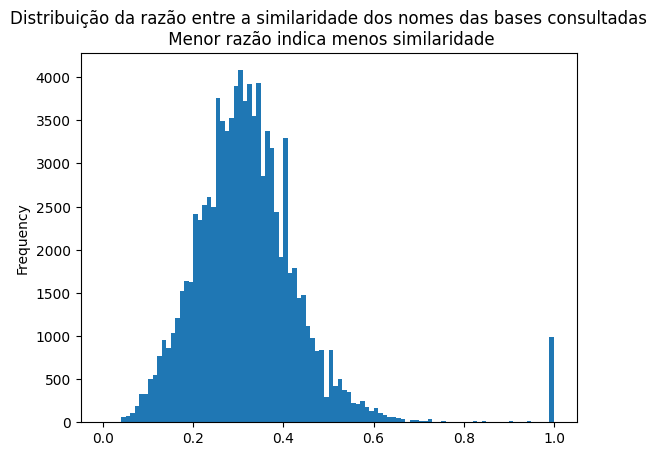

In [27]:
# Visualização da distribuição de similaridade entre os nomes
# das duas bases com CPFs "iguais".
# Nomes com similaridade próximos de 1 provavelmente são da mesma pessoa.
(
    df_socios_extratos['distance']
    .plot(
        kind='hist',
        bins=100,
        title=(
            'Distribuição da razão entre a similaridade dos nomes das bases consultadas\n Menor razão indica menos similaridade'
            ),
        
    )
);

(
    df_socios_extratos[df_socios_extratos['distance'] > 0.80]
    [['nome_socio', 'NM_CONTRAPARTE', 'distance']]
    .sort_values('distance')
    .drop_duplicates()
    .head(20)
)

In [28]:
# Elimina as linhas com pouca similaridade
df_socios_extratos = df_socios_extratos[df_socios_extratos['distance'] > 0.80]

In [30]:
for prefeito, sub_df in df_socios_extratos.groupby('NM_PRESTADOR_CONTA'):
    # Agrupa o df do Prefeito para somar todas as múltiplas
    # doações feitas por uma pessoa 
    sub_df = (
        sub_df.groupby(['NM_CONTRAPARTE'])
        .agg(
            {
                'nome_socio': lambda x: ''.join(set(x)), 
                'cpf_socio': lambda x: ''.join(set(x)),
                'VR_LANCAMENTO': 'sum',
                'distance': lambda x: set(x)
            }
        ).reset_index()
    )
    
    sub_df.to_csv(doacoes_f / f'{prefeito}_extr_soc.csv', index=False)